In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [34]:
data_df=pd.read_csv("/content/drive/MyDrive/Datasets/insurance.csv")


In [35]:
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data_df.shape

(1338, 7)

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
new_data=pd.get_dummies(data_df)

In [12]:
new_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [13]:
x=new_data.drop(columns='charges')
y=new_data['charges']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [15]:
x_train.shape,x_test.shape

((1070, 11), (268, 11))

In [16]:
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(10,name="inputLayer1"),
    tf.keras.layers.Dense(1,name="OutputLayer")
],name="insuranceModel")
model1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=tf.keras.metrics.mse
)
model1.fit(x_train,y_train,epochs=100,verbose=0)

In [17]:
model1.evaluate(x_train,y_train)

34/34 [==============================] - 0s 1ms/step - loss: 6645.9619 - mean_squared_error: 156005392.0000


[6645.9619140625, 156005392.0]

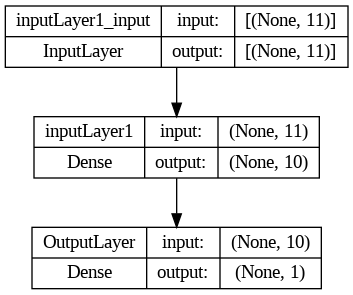

In [18]:
plot_model(model1,show_shapes=True)

In [19]:
model1.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6729.1045 - mean_squared_error: 158486432.0000


[6729.1044921875, 158486432.0]

In [20]:
y_train.mean(),y_train.median()

(13352.418761690653, 9618.996575000001)

In [21]:
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,name="in1"),
    tf.keras.layers.Dense(10,name="in2"),
    tf.keras.layers.Dense(1,name="output")
],name="model2")
model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=tf.keras.metrics.mse
)
history2=model2.fit(x_train,y_train,epochs=100,verbose=0)

model2.evaluate(x_train,y_train)
model2.evaluate(x_test,y_test)


9/9 [==============================] - 0s 2ms/step - loss: 5157.6460 - mean_squared_error: 99053112.0000


[5157.64599609375, 99053112.0]

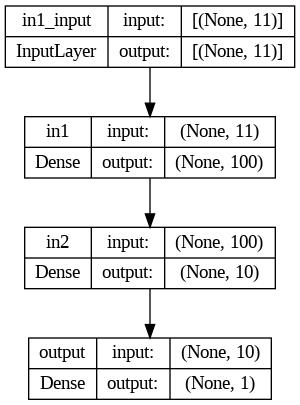

In [22]:
plot_model(model2,show_shapes=True)

Text(0, 0.5, 'mae')

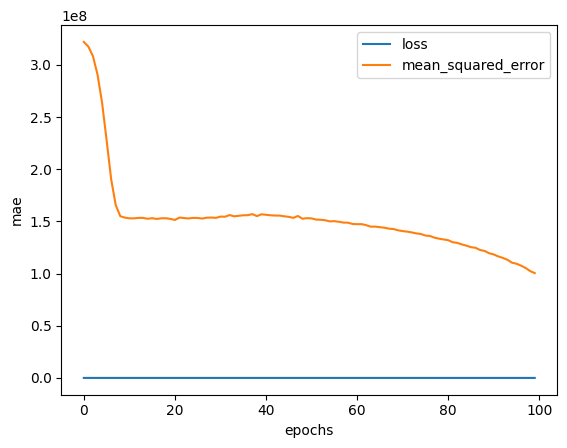

In [23]:
pd.DataFrame(history2.history).plot()
plt.xlabel("epochs")
plt.ylabel("mae")

How long you should train ?
tensorflow has solution earlyStopping callback. which can be added to stop training once it stops improving certain metric

### Preprocessing data
Normalization and Standardization -> bringing data on same scale between 0 to 1      
![Steps in modelling](https://drive.google.com/file/d/12_YmeokVrNpC_6Np_aykGDzonYSQiUee/view?usp=sharing)

![Feature Scaling](https://drive.google.com/file/d/1zPDFRmDtw5q4K-_0oP4DyjDDydsf7obC/view?usp=sharing)


Neural network tends to prefer Normalization

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder


In [25]:
data_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [26]:
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["smoker","sex","region"])
)
x=data_df.drop(columns="charges")
y=data_df["charges"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

ct.fit(x_train)
x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)

In [27]:
x_train_normal[0],x_train_normal.shape

(array([0.       , 0.5517004, 0.       , 0.       , 1.       , 1.       ,
        0.       , 0.       , 0.       , 1.       , 0.       ]),
 (1070, 11))

In [28]:
history_3=model2.fit(x_train_normal,y_train,epochs=100,verbose=0)

<Axes: >

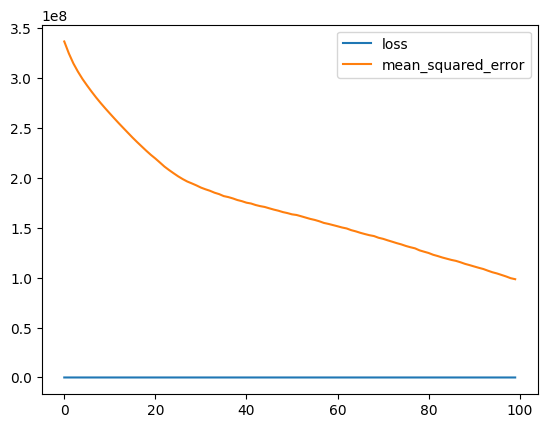

In [29]:
pd.DataFrame(history_3.history).plot()

In [30]:
model2.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6594.5117 - mean_squared_error: 99133064.0000


[6594.51171875, 99133064.0]

<Axes: ylabel='Frequency'>

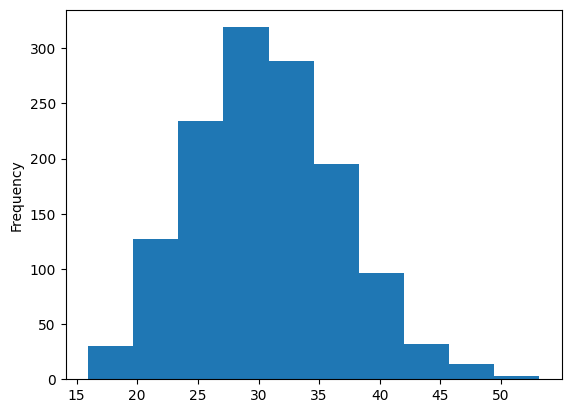

In [31]:
 new_data['bmi'].plot(kind='hist')